Sepehr Azardar
810199357
phase2


In [104]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical 
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

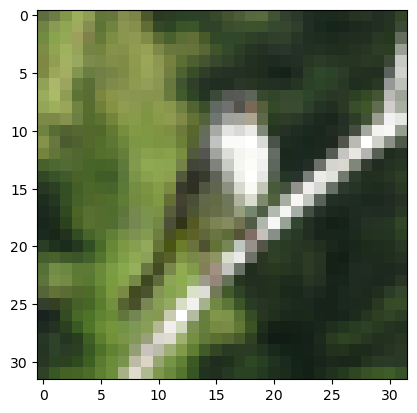

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


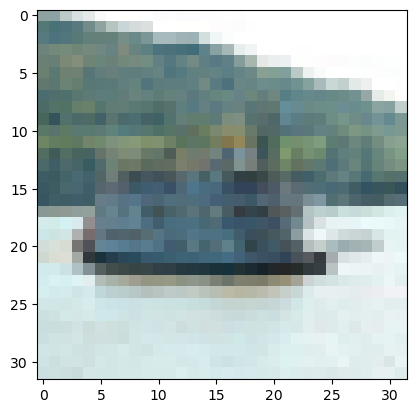

In [105]:
plt.imshow(random.choice(X_train))
plt.show()
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)
plt.imshow(random.choice(X_train))

In [106]:
#reshape and normalize
X_train_norm = X_train.astype('float32')
X_test_norm = X_test.astype('float32')
# normalize to range 0-1
X_train_norm = X_train_norm / 255.0
X_test_norm = X_test_norm / 255.0
print(type(X_train_norm))
# flatten to 1-d vector
# X_train = X_train_norm.reshape((X_train_norm.shape[0], 32, 32, 3))
# X_train = X_train.transpose(0, 3, 1, 2)
X_train = X_train_norm.reshape(X_train_norm.shape[0], -1)
# X_train = X_train_norm.flatten()
# print(X_train.shape)
# print(X_test.shape)
# y_train = y_train_norm.flatten()
X_test = X_test_norm.reshape(X_test_norm.shape[0], -1)

print(X_train.shape)
print(X_test.shape)
print(50000*32*32*3)
print(32*32*3)


<class 'numpy.ndarray'>
(50000, 3072)
(10000, 3072)
153600000
3072


In [107]:
# one hot encode target values
print(max(y_train))
print(y_train.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

[9]
(50000, 1)
(50000, 10)
(10000, 10)


# initialize the model

In [108]:
x = tf.ones([1,4,3])
# layer = layers.Dense(2, activation='softmax')
# layer2 = layers.Dense(2, activation='softmax')
# y = layer2(layer(x))
# print(y)
# print(layer.weights)
# # layers.Dense(,)
print('########################')
########################
model = keras.Sequential(
    [
        # keras.Input(shape=(4,2)),
        layers.Dense(2, input_shape=(4,3,)),
        # layers.Dense(2, activation="relu"),
        # layers.Dense(3, activation="relu"),
        # layers.Dense(4),
    ]
)
# model.add(layers.Dense(2, activation="relu", name="layer1"))
# model.add(layers.Dense(3, activation="relu", name="layer2"))
# model.add(layers.Dense(4, name="layer3"))
# model.pop()
y = model(x)
print(y)
print(model.weights[0], "\n----------------------------------------\n")
# model.summary()


########################
tf.Tensor(
[[[-0.604716  -0.8780952]
  [-0.604716  -0.8780952]
  [-0.604716  -0.8780952]
  [-0.604716  -0.8780952]]], shape=(1, 4, 2), dtype=float32)
<tf.Variable 'dense_213/kernel:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.6140721 ,  0.9171858 ],
       [-0.15091366, -0.824777  ],
       [ 0.16026974, -0.970504  ]], dtype=float32)> 
----------------------------------------



In [161]:
model = keras.Sequential(
    [
        keras.Input(shape=(3072,)),
    ]
)
model.add(layers.Dense(64, activation=keras.layers.LeakyReLU(), name="layer1"))
model.add(layers.Dense(32, activation=keras.layers.LeakyReLU(), name="layer2"))
# model.add(layers.Dense(64, activation="relu", name="layer1"))
# model.add(layers.Dense(32, activation="relu", name="layer2"))
model.add(layers.Dense(10, activation=keras.activations.softmax, name="layer3"))
model.summary()
# print(32*32*3 == 3072) # 10 == number of classes

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-2),
    loss=keras.losses.categorical_crossentropy, metrics=['accuracy']
)

# val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
val_dataset = (X_test, y_test)
model.save_weights('model.h5')
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
 validation_data=val_dataset)
# model.load_weights('model.h5')


Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                196672    
                                                                 
 layer2 (Dense)              (None, 32)                2080      
                                                                 
 layer3 (Dense)              (None, 10)                330       
                                                                 
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 991/1563 [==================>...........] - ETA: 3s - loss: 1.9743 - accuracy: 0.2862

KeyboardInterrupt: 

Train:
1563/1563 [==============================] - 6s 4ms/step
              precision    recall  f1-score   support

           0       0.61      0.43      0.51      5000
           1       0.61      0.53      0.57      5000
           2       0.32      0.48      0.38      5000
           3       0.45      0.17      0.25      5000
           4       0.58      0.15      0.24      5000
           5       0.48      0.29      0.36      5000
           6       0.43      0.66      0.52      5000
           7       0.38      0.70      0.49      5000
           8       0.61      0.65      0.63      5000
           9       0.50      0.61      0.55      5000

    accuracy                           0.47     50000
   macro avg       0.50      0.47      0.45     50000
weighted avg       0.50      0.47      0.45     50000

1563/1563 [==============================] - 6s 4ms/step
Test:
313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

    

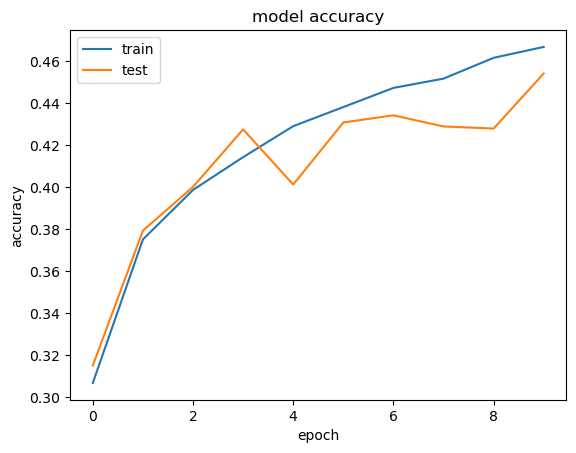

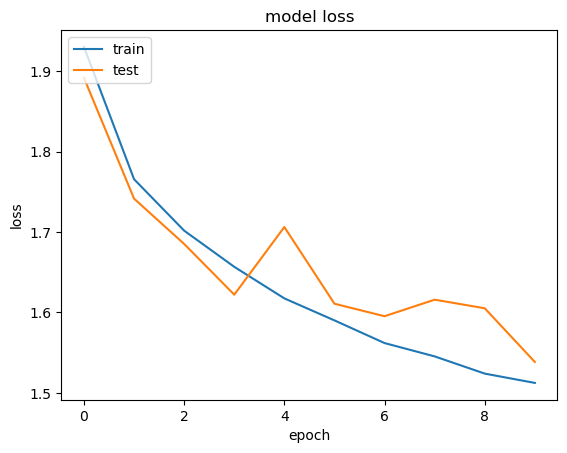

In [149]:
# report
def report(model, X, y):
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    y = np.argmax(y, axis=1)
    print(classification_report(y, y_pred))
    y_pred = model.predict(X)


# plot
def plot(history): 
    history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


print("Train:")
report(model, X_train, y_train)
print("Test:")
report(model, X_test, y_test)
plot(history)

# print(history.history.keys())
# print(history.history)
# print(history.history['val_loss'])

# optimizer

In [160]:
#momentum
# 0.5, 0.9, 0.99
print("Momentum 0.5")
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.5),
    loss=keras.losses.categorical_crossentropy, metrics=['accuracy']
)

model.load_weights('model.h5')
model.save_weights('model.h5')
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
 validation_data=val_dataset)
print("Train:")
report(model, X_train, y_train)
print("Test:")
report(model, X_test, y_test)
plot(history)
print("#####################################")

print("Momentum 0.9")
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9),
    loss=keras.losses.categorical_crossentropy, metrics=['accuracy']
)
model.load_weights('model.h5')
model.save_weights('model.h5')
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
 validation_data=val_dataset)
print("Train:")
report(model, X_train, y_train)
print("Test:")
report(model, X_test, y_test)
plot(history)
print("#####################################")

print("Momentum 0.99")
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=1e-2, momentum=0.97),
    loss=keras.losses.categorical_crossentropy, metrics=['accuracy']
)
model.load_weights('model.h5')
model.save_weights('model.h5')
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
 validation_data=val_dataset)
print("Train:")
report(model, X_train, y_train)
print("Test:")
report(model, X_test, y_test)
plot(history)


Momentum 0.5


ValueError: Cannot assign value to variable ' layer2/kernel:0': Shape mismatch.The variable shape (64, 64), and the assigned value shape (64, 32) are incompatible.

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9109 - accuracy: 0.3162 - val_loss: 1.7875 - val_accuracy: 0.3598
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7573 - accuracy: 0.3773 - val_loss: 1.7095 - val_accuracy: 0.3947
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6792 - accuracy: 0.4052 - val_loss: 1.6389 - val_accuracy: 0.4156
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6333 - accuracy: 0.4192 - val_loss: 1.6638 - val_accuracy: 0.4134
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6011 - accuracy: 0.4300 - val_loss: 1.5692 - val_accuracy: 0.4445
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5674 - accuracy: 0.4407 - val_loss: 1.5472 - val_accuracy: 0.4550
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5382 - accuracy: 0.4528 - val_loss: 1.5552 - val_ac

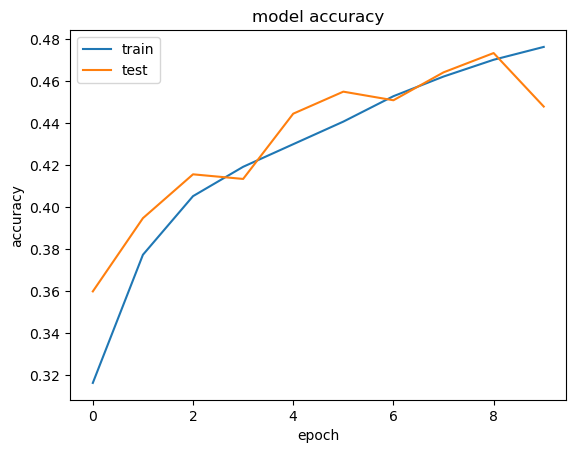

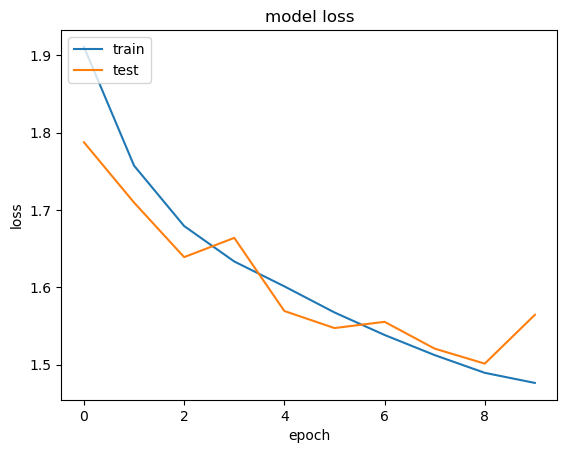

In [151]:
model.compile( 
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
     loss=keras.losses.categorical_crossentropy, metrics=["accuracy"]
)
model.load_weights('model.h5')
model.save_weights('model.h5')
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
  validation_data=val_dataset)
print("Train:")
report(model, X_train, y_train)
print("Test:")
report(model, X_test, y_test)
plot(history)

if the momentum is too high, the model will not converge, and not be stable. Because it overshoots the opimal(gobal minimal) solution. on the other hand, if the momentum is too low, the model will stuck in local minimal and behave exactly like SGD. Because it will not be able to jump over the local minimal solution.

# Loss Function

In [135]:
# MSE vs CCE
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.mse, metrics=['accuracy']
)
model.load_weights('model.h5')
model.save_weights('model.h5')
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
  validation_data=val_dataset)
print("Train:")
report(model, X_train, y_train)
print("Test:")
report(model, X_test, y_test)
plot(history)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3769 - accuracy: 0.5138 - val_loss: 1.4483 - val_accuracy: 0.4904
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3122 - accuracy: 0.5363 - val_loss: 1.4375 - val_accuracy: 0.4964
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2892 - accuracy: 0.5444 - val_loss: 1.4192 - val_accuracy: 0.5021
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2734 - accuracy: 0.5488 - val_loss: 1.4103 - val_accuracy: 0.5002
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2608 - accuracy: 0.5538 - val_loss: 1.4145 - val_accuracy: 0.5028
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2502 - accuracy: 0.5549 - val_loss: 1.4122 - val_accuracy: 0.5026
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2413 - accuracy: 0.5576 - val_loss: 1.4012 - val_accuracy:

# Regularization Effects

in this technique, we on each iteration, randomly turn some neurons off in each layer. by doing this, we are forcing the model to learn more robust features. because it will not rely on any specific neuron to learn the features. it will learn the features from the other neurons. this will help the model to generalize better.

we add some randomness to the data, so the generalization of the model will be better.
make neurons more robust to the noise in the data. and reduce thier relaibility on each other.
reduce the overfitting of the model. and reduce generalization error

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9498 - accuracy: 0.2993 - val_loss: 1.7959 - val_accuracy: 0.3429
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7984 - accuracy: 0.3565 - val_loss: 1.7478 - val_accuracy: 0.3807
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.7233 - accuracy: 0.3870 - val_loss: 1.7024 - val_accuracy: 0.3831
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6749 - accuracy: 0.4022 - val_loss: 1.6095 - val_accuracy: 0.4244
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6377 - accuracy: 0.4202 - val_loss: 1.5803 - val_accuracy: 0.4462
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6133 - accuracy: 0.4242 - val_loss: 1.5492 - val_accuracy: 0.4523
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5929 - accuracy: 0.4345 - val_loss: 1.5312 - val_ac

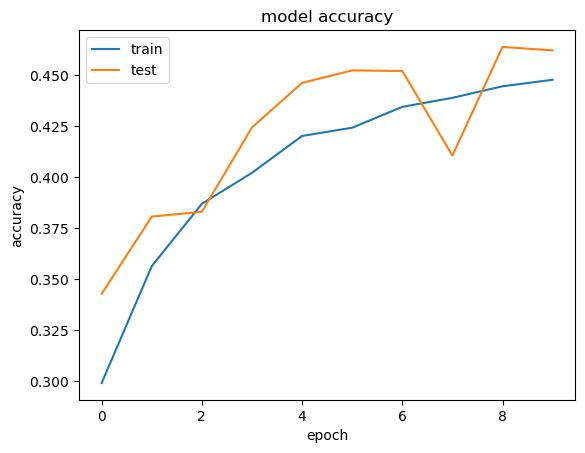

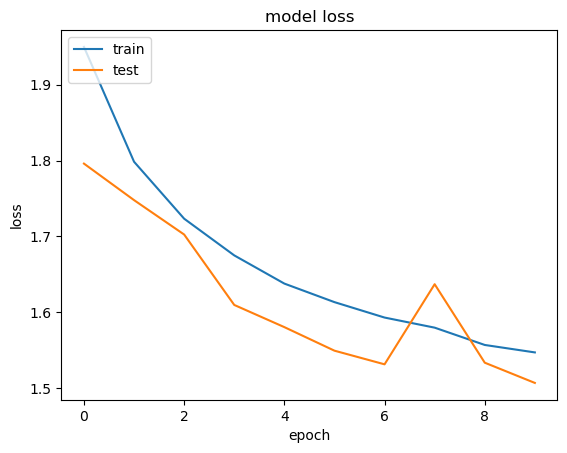

In [154]:
model = keras.Sequential(
  [
    keras.Input(shape=(3072,)),
    layers.Dense(64, activation=keras.layers.LeakyReLU(), name="layer1"),
    keras.layers.Dropout(0.1),
    layers.Dense(64, activation=keras.layers.LeakyReLU(), name="layer2"),
    keras.layers.Dropout(0.1),
    layers.Dense(10, activation=keras.activations.softmax, name="layer3")
  ]
)

model.compile( 
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
     loss=keras.losses.categorical_crossentropy, metrics=["accuracy"]
)

history = model.fit(X_train, y_train, batch_size=32, epochs=10,
  validation_data=val_dataset)
print("Train:")
report(model, X_train, y_train)
print("Test:")
report(model, X_test, y_test)
plot(history)
